Required Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import ElasticNet,Lasso,Ridge, SGDRegressor, LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("cleaned_data.csv")
df.head(5)

,Unnamed: 0,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats,Price
0,0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [3]:
df.shape

(6017, 12)

In [4]:
df.isnull().sum()

Unnamed: 0           0
Brand_Name_n         0
Year                 0
Kilometers_Driven    0
Fuel_Type_n          0
Transmission_n       0
Owner_Type_n         0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats,Price
0,0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [6]:
df_inputs=df.drop(['Price'],axis='columns')
df_target=df['Price']

In [7]:
df_inputs.head()

,Unnamed: 0,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
0,0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0


In [8]:
df_target.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_inputs,df_target,test_size=0.3,random_state=123)

Model Selection

In [10]:
X_train

,Unnamed: 0,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
425,425,10,2017,23163,4,1,0,15.29,1591.0,121.3,5.0
2556,2557,10,2013,84600,4,1,2,21.10,814.0,55.2,5.0
187,187,17,2017,24773,4,1,0,21.40,1197.0,83.1,5.0
5113,5115,17,2010,90246,4,1,0,16.10,1298.0,88.2,5.0
3932,3933,29,2015,100000,1,0,0,13.50,2400.0,215.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
5218,5220,10,2015,14925,4,1,0,18.50,1197.0,82.9,5.0
4060,4062,17,2015,30000,4,1,0,20.73,1373.0,91.1,5.0
1346,1346,9,2012,66245,4,1,0,17.00,1497.0,118.0,5.0
3454,3455,17,2014,41000,0,1,0,26.20,998.0,58.2,5.0


In [11]:
import warnings
warnings.filterwarnings("ignore")

model = [ElasticNet(),Lasso(),Ridge(), SGDRegressor(), SVR(), RandomForestRegressor(), AdaBoostRegressor()]
for i in model[0:4]:
    gride = GridSearchCV(estimator=i, cv=10, param_grid={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,1.10, 10,100]}, scoring='r2')
    gride.fit(X_train, y_train)
    pred = gride.predict(X_test)

In [12]:
from sklearn.model_selection import cross_val_score
def get_valdiation(model):
    cv=cross_val_score(model,X_train,y_train,cv=10)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("Regression: {} \n".format(model))
    print("Score: {:.2f} %".format(np.mean(cv)*100))
    print("Standard deviation: {:.2f}".format(np.std(cv)))
    print("R2 score from Predict: {} \n\n".format(np.round(r2_score(y_test, pred),2)))
    test_residual = y_test - pred
    sns.scatterplot(x=y_test, y=test_residual)
    plt.axhline(y=0,color='r',ls='--')
    plt.title("Regressor : {}".format(model))
    plt.show()
    sns.distplot(test_residual)
    plt.show()

Regression: ElasticNet(alpha=0.001) 

Score: 67.11 %
Standard deviation: 0.04
R2 score from Predict: 0.65 




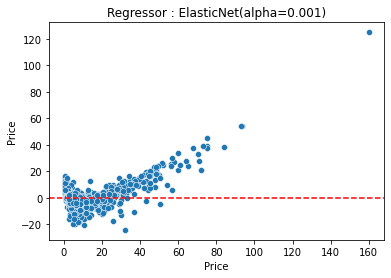

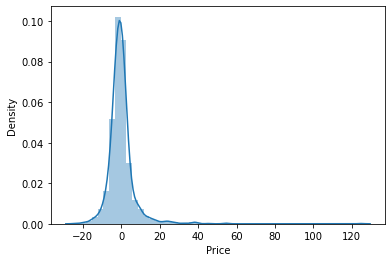

Regression: Lasso(alpha=10) 

Score: 58.11 %
Standard deviation: 0.05
R2 score from Predict: 0.6 




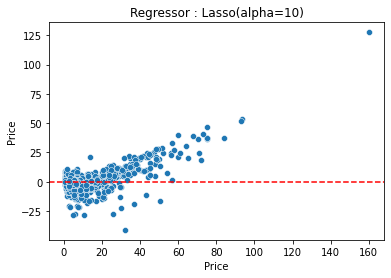

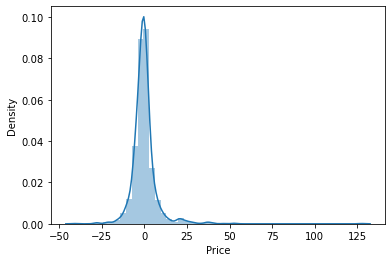

Regression: Ridge(alpha=1) 

Score: 67.11 %
Standard deviation: 0.04
R2 score from Predict: 0.65 




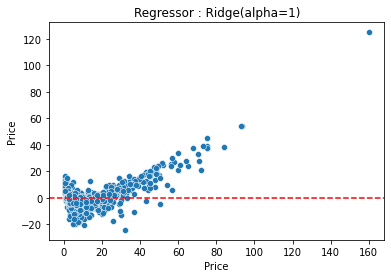

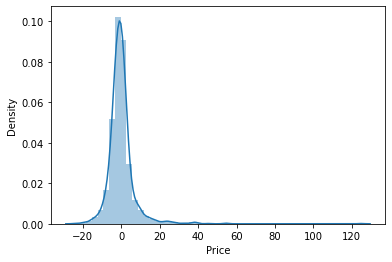

Regression: SGDRegressor() 

Score: -803272320885801920801248617267462144.00 %
Standard deviation: 8336751472578013056079003226472448.00
R2 score from Predict: -5.390361087394123e+33 




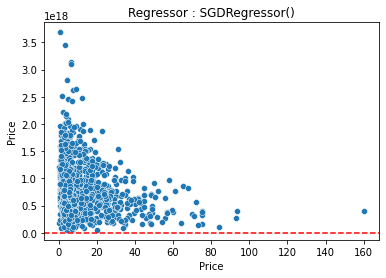

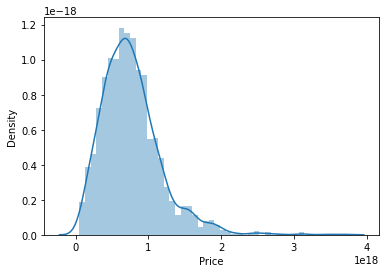

Regression: RandomForestRegressor() 

Score: 86.72 %
Standard deviation: 0.04
R2 score from Predict: 0.86 




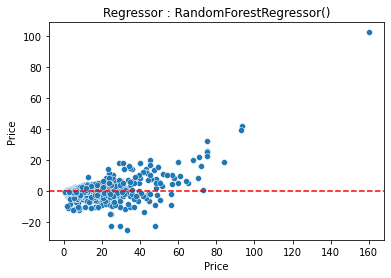

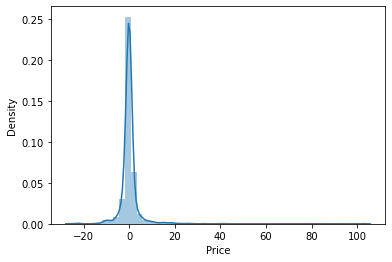

Regression: AdaBoostRegressor() 

Score: 32.02 %
Standard deviation: 0.24
R2 score from Predict: 0.42 




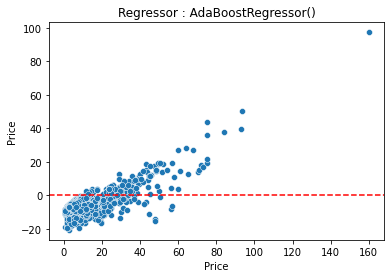

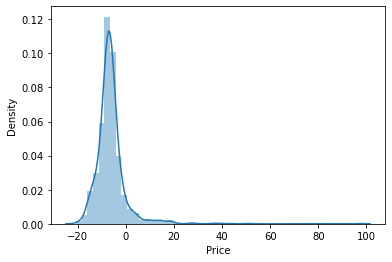

Regression: LinearRegression() 

Score: 67.11 %
Standard deviation: 0.04
R2 score from Predict: 0.65 




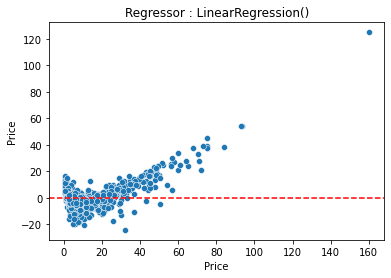

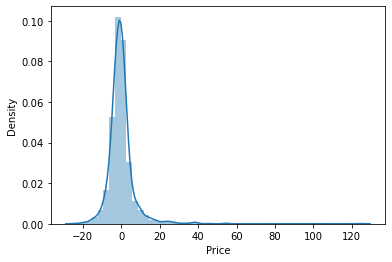

In [13]:
model = [ElasticNet(alpha=0.001),Lasso(alpha=10),Ridge(alpha=1), SGDRegressor(), RandomForestRegressor(), AdaBoostRegressor(), LinearRegression()]
for i in model:
    get_valdiation(i)

Best Model - Random Forest

In [14]:
Model_RandomForest = RandomForestRegressor(max_features='sqrt', bootstrap=True)
Model_RandomForest.fit(X_train, y_train)
Model_RandomForest.score(X_test, y_test)

0.8560922241801848

In [15]:
import pickle
filename = 'predict_model.pkl'
pickle.dump(Model_RandomForest, open(filename, 'wb'))

In [16]:
pwd

'C:\\Users\\ELCOT\\Desktop\\sprint2'